In [45]:
import requests

import pandas as pd
import geopandas as gpd

import matplotlib.pyplot as plt

import glob

#### get all dwd stations

In [46]:
url_htmlTable= "https://www.dwd.de/DE/leistungen/klimadatendeutschland/statliste/statlex_html.html;jsessionid=CC4D1D3747469498AAC32D809849EF38.live31091?view=nasPublication&nn=16102"

In [47]:
tbl=pd.read_html(url_htmlTable)
tbl=tbl[0].copy()
tbl.columns=tbl.columns.droplevel()
tbl

,Stationsname,Stations_ID,Kennung,Stations- kennung,Breite,Länge,Stations- höhe,Flussgebiet,Bundesland,Beginn,Ende
0,Aach,1,KL,02783,47.8410,8.8490,478,NaN,BW,01.01.1937,30.06.1986
1,Aach,1,RR,70191,47.8410,8.8490,478,NaN,BW,01.01.1912,30.06.1986
2,Aach/Hegau,10771,PE,10771,47.8500,8.8500,480,NaN,BW,27.02.1951,15.06.2000
3,Aachen,3,EB,02205,50.7827,6.0941,202,803100.0,NW,01.01.1951,31.03.2011
4,Aachen,3,FF,02205,50.7827,6.0941,202,803100.0,NW,01.01.1937,31.03.2011
...,...,...,...,...,...,...,...,...,...,...,...
20148,Zülpich-Enzen,5791,RR,78439,50.6580,6.6950,189,784390.0,NW,07.06.1900,22.03.2023
20149,Zülpich-Enzen/Voreifel,19540,MN,H922,50.6540,6.7080,185,NaN,NW,29.09.2022,23.03.2023
20150,Zülpich-Enzen/Voreifel,19540,RR,87569,50.6540,6.7080,185,NaN,NW,01.10.2022,22.03.2023
20151,Zülpich-Enzen/Voreifel,19540,SY,H922,50.6540,6.7080,185,NaN,NW,29.09.2022,22.03.2023


#### get all data from recent stations

In [42]:
# first downloaded "manually" (via DownloadThemaAll firefox browser add-in) from here
# https://opendata.dwd.de/climate_environment/CDC/observations_germany/climate/hourly/air_temperature/recent/

temp_hist_url=r"../wetter/dwd_akt/stundenwerte_TU_*"

files = glob.glob(temp_hist_url)
files=[x for x in files if not x.endswith('.zip') ]
len(files)

504

In [40]:
# takes ~2min

temp_hist_data_all=pd.DataFrame()

for f in files:
    txt_file = glob.glob(f+"/produkt_tu*")
    temp_hist_data= pd.read_csv(txt_file[0], sep=';')
    
    #temp_hist_data_all=temp_hist_data_all.concat(temp_hist_data)

    temp_hist_data_all=pd.concat([temp_hist_data_all, temp_hist_data])

In [41]:
temp_hist_data_all

,STATIONS_ID,MESS_DATUM,QN_9,TT_TU,RF_TU,eor
0,44,2021092000,3,11.8,88.0,eor
1,44,2021092001,3,11.7,88.0,eor
2,44,2021092002,3,11.5,89.0,eor
3,44,2021092003,3,11.4,88.0,eor
4,44,2021092004,3,11.2,90.0,eor
...,...,...,...,...,...,...
13195,19172,2023032319,1,10.2,74.0,eor
13196,19172,2023032320,1,10.4,77.0,eor
13197,19172,2023032321,1,10.0,80.0,eor
13198,19172,2023032322,1,10.0,83.0,eor


In [ ]:
station_ids=temp_hist_data_all['STATIONS_ID'].unique()

#### get only stations that provide current/recent data

In [51]:
tbl=tbl[tbl['Stations_ID'].isin(station_ids)].drop_duplicates(subset=['Stations_ID']).copy()

In [53]:
gdf_tbl = gpd.GeoDataFrame(
                tbl, 
                geometry=gpd.points_from_xy(tbl['Länge'],tbl['Breite']),
                crs=4326)
#gdf_tbl.plot()

<Axes: >

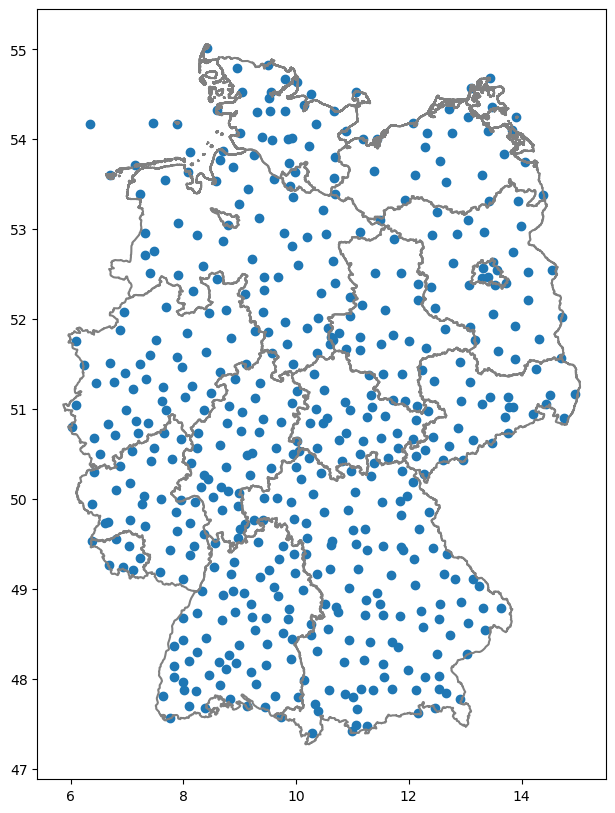

In [122]:
fig, ax = plt.subplots(figsize=(10, 10))
gdf_tbl.plot(ax=ax)

bland = gpd.read_file("https://raw.githubusercontent.com/isellsoap/deutschlandGeoJSON/main/2_bundeslaender/1_sehr_hoch.geo.json")
bland.boundary.plot(ax=ax, color='gray')

In [113]:
gdf_tbl

,Stationsname,Stations_ID,Kennung,Stations- kennung,Breite,Länge,Stations- höhe,Flussgebiet,Bundesland,Beginn,Ende,geometry
20,Aachen-Orsbach,15000,EB,02206,50.7980,6.0240,231,803110.0,NW,01.04.2011,22.03.2023,POINT (6.02400 50.79800)
101,Ahaus,7374,EB,01600,52.0813,6.9409,46,690250.0,NW,01.03.2006,22.03.2023,POINT (6.94090 52.08130)
206,Aldersbach-Kriestorf,73,KL,04519,48.6160,13.0510,340,922400.0,BY,01.03.1959,22.03.2023,POINT (13.05100 48.61600)
215,Alfeld,7367,EB,01852,51.9643,9.8072,144,546670.0,NI,01.12.2007,22.03.2023,POINT (9.80720 51.96430)
225,Alfhausen,78,EB,01145,52.4850,7.9130,64,604430.0,NI,01.01.1981,22.03.2023,POINT (7.91300 52.48500)
...,...,...,...,...,...,...,...,...,...,...,...,...
19948,Zehdenick,5745,EB,03326,52.9660,13.3270,51,461050.0,BB,01.01.1992,22.03.2023,POINT (13.32700 52.96600)
19964,Zeitz,5750,KL,03390,51.0310,12.1500,264,441360.0,ST,01.09.1952,22.03.2023,POINT (12.15000 51.03100)
20053,Zinnwald-Georgenfeld,5779,EB,04414,50.7313,13.7516,877,411400.0,SN,09.11.2000,22.03.2023,POINT (13.75160 50.73130)
20086,Zugspitze,5792,FF,04155,47.4210,10.9848,2956,920280.0,BY,01.01.1976,22.03.2023,POINT (10.98480 47.42100)


#### built voronoi shapes to create polygone of area nearest to each station

In [123]:
from shapely import LineString, MultiPoint, normalize, Point, Polygon, MultiPolygon

In [124]:
from shapely.ops import voronoi_diagram

In [125]:
#gdf_tbl.geometry.values

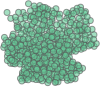

In [66]:
MultiPoint(gdf_tbl.geometry.values)

In [67]:
vnd=voronoi_diagram(MultiPoint(gdf_tbl.geometry.values), envelope=None, tolerance=0.0, edges=False)

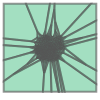

In [68]:
vnd

In [69]:
gdf_vnd = gpd.GeoDataFrame(crs='epsg:4326', geometry=[vnd])

In [71]:
gdf_vnd_ex=gdf_vnd.explode(index_parts=True)
gdf_vnd_ex

geometry
0 0    POLYGON ((-2.90300 53.91559, 5.22621 53.06686,...
  1    POLYGON ((-2.90300 51.94029, 4.65624 51.38296,...
  2    POLYGON ((4.72716 49.75210, 5.76524 50.18777, ...
  3    POLYGON ((-2.90300 63.93800, 3.55195 63.93800,...
  4    POLYGON ((5.76524 50.18777, 6.14747 50.48913, ...
...                                                  ...
  499  POLYGON ((14.45519 52.22163, 14.34592 52.35985...
  500  POLYGON ((14.50217 51.41168, 14.45857 51.57882...
  501  POLYGON ((14.29954 51.23602, 14.50217 51.41168...
  502  POLYGON ((23.87800 53.97444, 15.45493 51.75319...
  503  POLYGON ((23.87800 44.63402, 20.99213 46.24174...

[504 rows x 1 columns]

In [76]:
import numpy as np

In [121]:
gdf_ex_clipped = gpd.clip(gdf_vnd_ex.reset_index(), bland.buffer(0.02)) # buffer to make sure station is within shape


C:\Users\simon\AppData\Local\Temp\ipykernel_47124\4182129898.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf_ex_clipped = gpd.clip(gdf_vnd_ex.reset_index(), bland.buffer(0.02))


<Axes: >

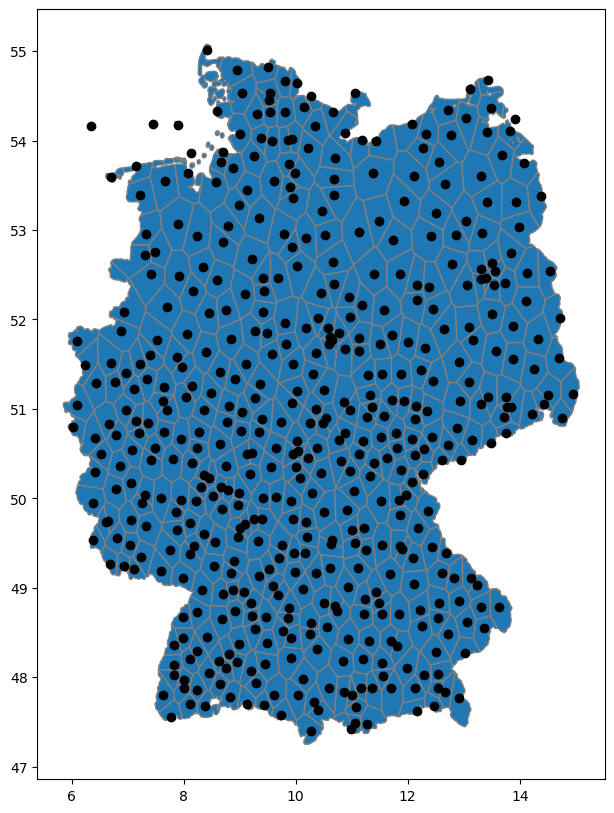

In [126]:
ax=gdf_ex_clipped.plot(figsize=(10,10), linewidth=1, edgecolor='gray')
gdf_tbl.plot(ax=ax, color='k')

In [129]:
gdf_vn_wetter=gdf_ex_clipped.sjoin(gdf_tbl)

In [130]:
gdf_vn_wetter=gdf_vn_wetter[['geometry','Stationsname','Stations_ID','Bundesland','Beginn','Ende']]

In [131]:
gdf_vn_wetter

,geometry,Stationsname,Stations_ID,Bundesland,Beginn,Ende
69,"POLYGON ((7.83775 47.75371, 7.90848 47.70179, ...",Rheinfelden,4175,BW,01.09.1953,22.03.2023
10,"POLYGON ((6.59671 49.51498, 6.59841 49.47398, ...",Perl-Nennig,3904,SL,01.01.1981,22.03.2023
11,"POLYGON ((7.55011 48.08234, 7.82186 47.83799, ...",Müllheim,259,BW,01.05.1978,31.07.1993
22,"POLYGON ((6.59841 49.47398, 6.82247 49.37688, ...",Berus,460,SL,01.01.1981,22.03.2023
78,"POLYGON ((7.95232 48.25508, 7.98475 48.11407, ...",Emmendingen-Mundingen,1224,BW,01.11.1975,22.03.2023
...,...,...,...,...,...,...
404,"POLYGON ((12.91739 54.44100, 12.85751 54.22662...",Barth,298,MV,01.11.1991,22.03.2023
337,"POLYGON ((13.30868 54.50175, 13.23985 54.37987...",Hiddensee-Vitte,2201,MV,01.10.1996,31.07.2005
495,"POLYGON ((14.17434 53.21600, 14.13172 53.48882...",Grambow-Schwennenz,6109,MV,01.10.1998,22.03.2023
476,"MULTIPOLYGON (((13.78274 54.22678, 13.78415 54...",Greifswalder Oie,1759,MV,25.10.2000,22.03.2023


<Axes: >

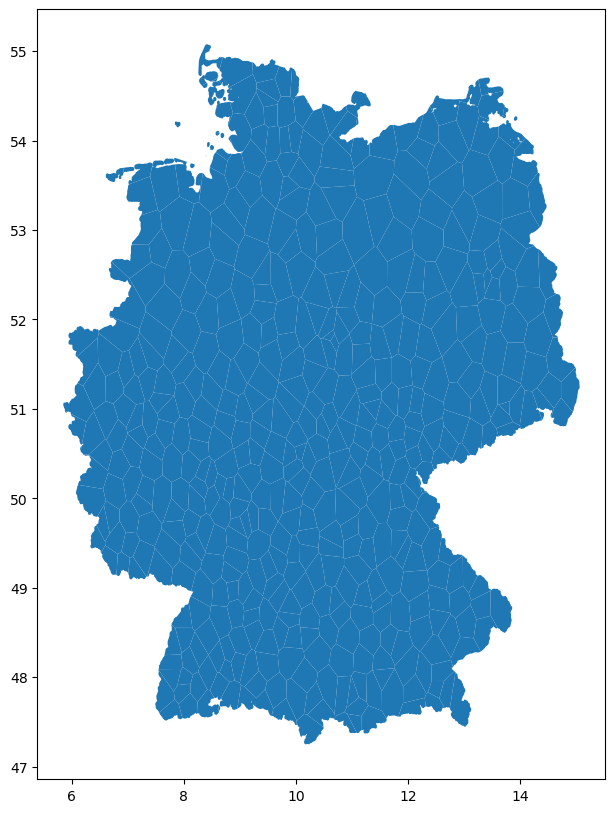

In [132]:
gdf_vn_wetter.plot(figsize=(10,10))

In [133]:
# voronoi shapes (incl. station data to geojson)
gdf_vn_wetter.to_file("gdf_vn_wetter.geojson", driver='GeoJSON')

In [114]:
# station data to geojson
gdf_tbl.to_file("gdf_vn_wetter_points.geojson", driver='GeoJSON')